In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches

DataPath='./Data/Data_F45_Stoch_TMEVm'


%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath):
    os.makedirs(DataPath)
if not os.path.isfile(DataPath+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F45_Stoch_TMEVm.ipynb

In [3]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_3examples = [viridis(0.05)[0:3],viridis(0.5)[0:3],viridis(0.9)[0:3]]
# alpha_value=0.45
size_scaler = 2.5
alp=0.1 # alpha value for transparent lines N=30

h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

## Figure 4a  

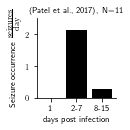

In [4]:
##### Plotting left panel with animal model data #####
data = load_animal_model_data('Patel_et_al_2017')

days_int_1 = 1 # days corresponding to time intervals for data visulization
days_int_2 = [2, 7]
days_int_3 = [8, 15]
days_vect= np.linspace(1,3,3) # 3 time intervals for visualization

n_seiz_avg_3intervals=np.zeros(np.shape(days_vect)) # average seizure frequency for all subjects in 3 time windows
n_seiz_avg_3intervals[0]=data['seiz_count'][0]/data['N_animals_seiz_observ']
n_seiz_avg_3intervals[1]=np.sum(data['seiz_count'][days_int_2[0]-1:days_int_2[1]])/len(data['seiz_count'][days_int_2[0]-1:days_int_2[1]])/data['N_animals_seiz_observ']
n_seiz_avg_3intervals[2]=np.sum(data['seiz_count'][days_int_3[0]-1:days_int_3[1]])/len(data['seiz_count'][days_int_3[0]-1:days_int_3[1]])/data['N_animals_seiz_observ']

plt.rc('font', **font)

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)

plt.bar(days_vect, n_seiz_avg_3intervals,color='black')
plt.ylim([0,2.5])
xtix=['1','2-7','8-15']
plt.xticks(days_vect,xtix)
plt.xlabel('days post infection')
plt.ylabel(r'Seizure occurrence $\frac{\textnormal{seizures}}{\textnormal{day}}$')
plt. title ('(Patel et al., 2017), N=11',fontsize=font['size'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(w,w) 
fig.savefig('Figures/Fig4/Fig_4a1.pdf')

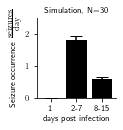

In [5]:
##### Plotting right panel with simulation data #####
# First calculating average seizure frequency for all subjects in 3 time windows #
N=30 # number of subjects

days_int_1 = 1 # days corresponding to time intervals for data visulization
days_int_2 = [2, 7]
days_int_3 = [8, 15]
days_vect= np.linspace(1,3,3) # 3 time intervals for visualization

for ii in range(1,N+1): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath+'/Sim_'+str(ii)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==1:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])

n_seiz_3periods_EachSubj=np.zeros([30,3])
n_seiz_3periods_EachSubj[:,0]=num_seiz_at_days[:,0]
n_seiz_3periods_EachSubj[:,1]=np.mean(num_seiz_at_days[:,days_int_2[0]-1:days_int_2[1]],axis=1)
n_seiz_3periods_EachSubj[:,2]=np.mean(num_seiz_at_days[:,days_int_3[0]-1:days_int_3[1]],axis=1)

n_seiz_avg_3periods=np.mean(n_seiz_3periods_EachSubj,axis=0)
n_seiz_sem_3periods=np.std(n_seiz_3periods_EachSubj,axis=0)/np.sqrt(N)


# plotting #

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)
# fig.set_size_inches(w,w)

plt.bar(days_vect, n_seiz_avg_3periods,color='black',
       yerr=n_seiz_sem_3periods,align='center',
       alpha=1,
       ecolor='black',
       capsize=15/size_scaler)

plt.xlabel('days post infection')
plt.ylabel(r'Seizure occurrence $\frac{\textnormal{seizures}}{\textnormal{day}}$')
plt. title ('Simulation, N=30',fontsize=font['size'])
plt.ylim([0,2.5])
xtix=['1','2-7','8-15']
plt.xticks(days_vect,xtix)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(w,w) 
fig.savefig('Figures/Fig4/Fig_4a2.pdf')


In [6]:
# Additional calculation of latent period duration 
N=30 
day_first_seiz=np.zeros(N)
for ii in range(1,N+1): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath+'/Sim_'+str(ii)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii-1]=seiz_days[0]
day_first_seiz_simdec=day_first_seiz
LP_mean=np.mean(day_first_seiz)   
LP_sem=np.std(day_first_seiz)/np.sqrt(N)
print('Latent period duration is '+str(LP_mean)+'+-'+str(LP_sem))

Latent period duration is 2.8333333333333335+-0.12546210878484684


## Figure 4b  

In [ ]:
##### Plotting left panel with animal model data #####
data = load_animal_model_data('Patel_et_al_2017')

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(w,w)

rects1 = ax.bar(np.arange(0,len(data['days_vect_TNF_observ'])), data['TNF_mean_vect'], color='tab:red')
err1, cl, _ = ax.errorbar(np.arange(0,len(data['days_vect_TNF_observ'])), data['TNF_mean_vect'], yerr=data['TNF_sem_vect'], lolims=True, capsize = 15/size_scaler, ls='None', color='k')
cl[0].set_marker('_')
cl[1].set_marker('')  # to remove the lower cap

plt.xticks(np.arange(0,len(data['days_vect_TNF_observ'])), data['days_vect_TNF_observ'])
plt.xlabel(r'days post infection')
plt.ylabel(r'TNF protein (fold change)')
plt.xticks(np.arange(0,len(data['days_vect_TNF_observ'])), data['days_vect_TNF_observ'])

plt. title ('(Patel et al., 2017),\n N=8, 6,  5',fontsize=font['size'])
# plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w)
fig.savefig('Figures/Fig4/Fig_4b1.pdf')


In [ ]:
##### Plotting right panel with simulation data #####
# First calculating the statistics for days corresponding to animal model data #
data = load_animal_model_data('Patel_et_al_2017')
days_vect=data['days_vect_TNF_observ']

N=30
I_array=np.zeros([N,len(days_vect)])

for ii in range(0,N): # Here we gather and extract data about N and B values on days 5,7,14,21,35
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    I_vec=listt[1]['I_vec'].copy()
    I_array[ii]=I_vec[np.array((np.array(days_vect)/dt),'i')]
    
I_mean_vect=np.mean(I_array,axis=0)
I_std_vect=np.std(I_array,axis=0)
I_sem_vect=I_std_vect/np.sqrt(N)

# plotting #

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)
# fig.set_size_inches(w,w)

rects1 = ax.bar(np.arange(0,len(days_vect)), I_mean_vect, color='tab:red')
err1, cl, _ = ax.errorbar(np.arange(0,len(days_vect)), I_mean_vect, yerr=I_sem_vect, lolims=True, capsize = 15/size_scaler, ls='None', color='k')
cl[0].set_marker('_')
cl[1].set_marker('')  # to remove the lower cap
    
plt.xticks(np.arange(0,len(days_vect)), days_vect)
plt.xlabel('days post infection')
plt.ylabel(r'Neuroinflammation intensity $I(t)$')
plt. title (r'Simulation, N=30',fontsize=font['size'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(w,w) 
fig.savefig('Figures/Fig4/Fig_4b2.pdf')

## Figure 4c 

In [ ]:
##### Plotting left panel with animal model data #####
data = load_animal_model_data('Kirkman_et_al_2010')

# data['days_vect'] = [1,2,3,4,5,7,14,21,35]
# data['NeurLoss_mean_vect'] = np.array([0,0,0,0.5, 1.1, 3.8, 4.0, 4.5, 3.8])
# data['NeurLoss_sem_vect'] = np.array([0,0,0, 0.3, 0.4, 0.4, 0.7, 0.5, 0.9])
        
fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)  
fig.set_size_inches(w, w)

rects1 = ax.bar(np.arange(0,len(data['days_vect'])), data['NeurLoss_mean_vect'], color='darkblue')
err1, cl, _ = ax.errorbar(np.arange(0,len(data['days_vect'])), data['NeurLoss_mean_vect'], yerr=data['NeurLoss_sem_vect'], lolims=True, capsize = 5/size_scaler, ls='None', color='k')
cl[0].set_marker('_')
cl[1].set_marker('')  # to remove the lower cap

plt.ylim([0,6])
plt.xticks(np.arange(0,len(data['days_vect'])), data['days_vect'])
ytix=list(np.arange(0,7))
plt.yticks(np.arange(0,7),ytix)
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(6) 

plt.xlabel('days post infection')
plt.ylabel('Neuronal loss score')
plt. title ('(Kirkman et al., 2010), \n N=4-13 per group',fontsize=font['size'])
# plt.tight_layout()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w) 
fig.savefig('Figures/Fig4/Fig_4c1.pdf')

In [ ]:
##### Plotting right panel with simulation data #####
# First masking the data and calculating the statistics for days corresponding to animal model data (for masking procedure explained, see Appendix) #
data = load_animal_model_data('Kirkman_et_al_2010')
days_vect=data['days_vect']

N=30
D_array=np.zeros([N,len(days_vect)])

for ii in range(0,N): # Here we gather and extract data about N and B values on days 5,7,14,21,35
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)    
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()   
    D_array[ii]=D_vec[np.array((np.array(days_vect)/dt),'i')]

# Masking  D_array according to rules from [Kirkman et al., 2010]:
D_array[(D_array>=0.6)]=3
D_array[(D_array>=0.3)==(D_array<0.6)]=2
D_array[(D_array>=0.1)==(D_array<0.3)]=1
D_array[D_array<0.1]=0
# Doubling everything to the form of  [Kirkman et al., 2010]:
D_array=D_array*2
    
D_mean_vect=np.mean(D_array,axis=0)
D_std_vect=np.std(D_array,axis=0)
D_sem_vect=D_std_vect/np.sqrt(N)


# plotting # 

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)  

rects1 = ax.bar(np.arange(0,len(days_vect)), D_mean_vect, color='darkblue')
err1, cl, _ = ax.errorbar(np.arange(0,len(days_vect)), D_mean_vect, yerr=D_sem_vect, lolims=True, capsize = 5/size_scaler, ls='None', color='k')
cl[0].set_marker('_')
cl[1].set_marker('')  # to remove the lower cap

plt.ylim([0,6])
plt.xticks(np.arange(0,len(days_vect)), days_vect)
ytix=list(np.arange(0,7))
plt.yticks(np.arange(0,7),ytix)
plt.xticks(np.arange(0,len(days_vect)), days_vect)
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(6) 

plt.xlabel('days post infection')
plt.ylabel('Neuronal loss score')
plt. title ('Simulation, N=30',fontsize=font['size'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(w,w) 
fig.savefig('Figures/Fig4/Fig_4c2.pdf')

## Supplementary figure  for masking procedure 

In [ ]:
data = load_animal_model_data('Kirkman_et_al_2010')
days_vect=data['days_vect']
N=30
D_array=np.zeros([N,len(days_vect)])

for ii in range(0,N): # Here we gather and extract data about N and B values on days 5,7,14,21,35
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()
    D_array[ii]=D_vec[np.array((np.array(days_vect)/dt),'i')]
    
D_mean_vect=np.mean(D_array,axis=0)
D_std_vect=np.std(D_array,axis=0)
D_sem_vect=D_std_vect/np.sqrt(N)

# plotting #

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)  

plt.bar(days_vect, D_mean_vect,color='white',
       yerr=D_sem_vect,
       align='center',
       alpha=1,
       ecolor='darkblue',
       capsize=10/size_scaler)
plt.plot(days_vect, D_mean_vect,'.',color='darkblue',markersize=15/size_scaler)


for ii in range(0,N): # Here we gather and extract data about N and B values on days 5,7,14,21,35
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()
    plt.plot(t_vec[0:int(days_vect[-1]/dt)],D_vec[0:int(days_vect[-1]/dt)],color='darkblue',alpha=alp)

plt.plot([0,t_vec[int(days_vect[-1]/dt)]],[0.1,0.1],'k--') # plotting horizontal lines for score border values
plt.plot([0,t_vec[int(days_vect[-1]/dt)]],[0.3,0.3],'k--')
plt.plot([0,t_vec[int(days_vect[-1]/dt)]],[0.6,0.6],'k--')

plt.xlim([0,days_vect[-1]+1])
plt.ylim([0,1])
plt.xticks(np.arange(0,days_vect[-1]+1,5))
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation(45)

plt.xlabel('days post infection')
plt.ylabel(r'Extent of neuronal death $D(t)$')
plt. title (r'Simulation, N=30',fontsize=font['size'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(1.5*w,2*w)  
fig.savefig('Figures/Supplementary/Fig_SupplF4.pdf')


## Figure 4d

In [ ]:
N=30
day_0=0
day_end=35

listt=np.load(DataPath+'/Sim_'+str(1)+'.npy',allow_pickle=True)  
rect = patches.Rectangle((listt[0]['IBDR_E_duration'][0],-1),listt[0]['IBDR_E_duration_Complex'][0]-listt[0]['IBDR_E_duration'][0],2,linewidth=1,edgecolor='none',facecolor='tab:red',alpha=0.2)

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)    

ax.add_patch(rect)
plt.plot([day_0, day_end],[listt[0]['Theta'],listt[0]['Theta']],'--',color='tab:red',linewidth = 4.0/size_scaler)

for ii in range(0,N):
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    I_vec=listt[1]['I_vec'].copy()
    plt.plot(t_vec[day_0:int(day_end/dt)],I_vec[day_0:int(day_end/dt)],color='tab:red',alpha=alp)
    
plt.ylim([0,0.5])
plt.xlim([day_0,day_end])
plt.xticks(np.arange(0,day_end+1,5))
plt.xlabel('days post infection')
plt.ylabel(r'Neuroinflammation intensity $I(t)$')
plt. title (r'Simulation, N=30',fontsize=font['size'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(2.5*w,w) 
fig.savefig('Figures/Fig4/Fig_4d.pdf')

## Figure 4e

In [ ]:
N=30
timepoint=35 # dpi for neuornal loss measuring
D_timepoint=[]
num_seiz_during1week=[]

for ii in range(0,N): # Here we gather and extract data about seizures and neuronal loss on respective  time windows 
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_end=listt[0]['t_end']
    t_vec=listt[1]['t_vec'].copy()
    S_vec=listt[1]['S_vec'].copy()
    seiz_days=np.floor(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    num_seiz_during1week.append(np.sum(num_seiz_at_days_tmp[0:7]))
    D_timepoint.append(listt[1]['D_vec'][int(timepoint/dt)])
    
    
from sklearn.linear_model import LinearRegression # building linear regression model to check the correlation trend
y=np.array(D_timepoint)
x=np.array(num_seiz_during1week).reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
x_pred = np.array([min(num_seiz_during1week)-2., max(num_seiz_during1week)+1]).reshape(-1,1)
y_pred = model.predict(x_pred)

# plotting #

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)   

plt.plot(num_seiz_during1week, D_timepoint,'.',color='darkblue', markersize=10/size_scaler)
plt.plot(x_pred,y_pred,'-',color='darkblue',alpha=0.5)
plt. title ('Simulation, N=30,\n 35 days post infection',fontsize=font['size'])
ax.text(.3,.82,r'$\textnormal{R}^2$ = '+str(float(int(r_sq*100))/100),
        horizontalalignment='center',
        transform=ax.transAxes)

plt.xlabel('Number of seizures during \n first week post infection')
plt.ylabel(r'Extent of neuronal loss $D(t)$')
plt.yticks([0.36, 0.38, 0.4, 0.42])
plt.xticks([5,10,15,20,25])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(1*w,w)  
fig.savefig('Figures/Fig4/Fig_4e.pdf')

## Figure 4f

In [ ]:
# Calculation of data from raw simulated data
N=30 # number of subjects
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
        
# Here we gather average number of seizures per animal per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])



# plotting #

day_0 = 0 # time interval for visualization on early post injury period
day_end = 21
day_0_late = 358 # time interval for vizualization on 1 year post injury
day_end_late = 365

days_vect= np.linspace(day_0, day_end, day_end-day_0+1, endpoint=True)
days_vect_late= np.linspace(day_0_late, day_end_late, day_end_late-day_0_late+1, endpoint=True)

fig = matplotlib.pyplot.gcf()
ax1 = fig.add_subplot(1, 30, (1,21))    

im1 = plt.pcolormesh(days_vect, np.arange(0,N+1),num_seiz_at_days[:,day_0:day_end])
plt.xticks(np.array([0,7,14,20])+0.5,np.array([0,7,14,20])+1)
plt.yticks(np.arange(0,N+1)+0.5,np.arange(0,N+1)+1)
plt.xlim([day_0, day_end])
plt.ylim([0,N])
cbar=plt.colorbar(im1)
cbar.set_label(r'$\frac{\textnormal{seizures}}{\textnormal{day}}$', rotation=90,fontsize=6)
cbar.ax.tick_params(labelsize=5)
plt.xlabel('days post infection')
plt.ylabel(' Animal \#')
plt. title ('Simulation, N=30',fontsize=font['size'])

ax2 = fig.add_subplot(1, 30, (24,30))
im2 = plt.pcolormesh(days_vect_late, np.arange(0,N+1),num_seiz_at_days[:,day_0_late:day_end_late])
plt.xticks(np.array([358,364])+0.5,np.array([358,364])+1)
plt.yticks([])

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(5) 
    tick.label.set_rotation('horizontal')
    
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(5) 
    tick.label.set_rotation('horizontal')    
    
plt.xlim([day_0_late, day_end_late])
plt.ylim([0,N])
plt.xlabel('days post infection')
cbar=plt.colorbar(im2)
cbar.set_label(r'$\frac{\textnormal{seizures}}{\textnormal{day}}$', rotation=90,fontsize=6)
cbar.ax.tick_params(labelsize=5)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(2.5*w,1.5*w)
fig.savefig('Figures/Fig4/Fig_4f.pdf')